# Churn Modelling with Logistic Regression

### Predict customer leave or not

- Defining the problem statement
- Collecting the data
- Data analysis
- Visual Analyzis
- Create Model
- Leaerning Plots



## 1. Problem statement

Based on the data from the bank, create a classifier to predict whether the customer will leave the bank or not

<img src = "img/1.png" alt="Drawing"align="center", style ="height:400px">

## 2. Collecting the data
Data are given by [Kaggle](https://www.kaggle.com/yogirj/churn-modelling)

### Import libraries

In [90]:
import numpy as np
import pandas as pd

In [91]:
ds = pd.read_csv("Churn_Modelling.csv")

### 3. Data Analyzis

In [92]:
ds.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [93]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [94]:
print("Null values counter : ")
pd.DataFrame(ds.isnull().sum()).T

Null values counter : 


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Distribution of data is the same, null value isn't exist

In [95]:
print("Customers: \n")
print("Out : ",ds[ds["Exited"]== 1].count().max())
print("Stayed :",ds[ds["Exited"]== 0].count().max())

Customers: 

Out :  2037
Stayed : 7963


## 4. Visualization 

### 4.1 Import libraries

In [96]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()# default seaborn plot style

### 4.2 Analyzis

## 5. Data Preprocessing

### 5.1 Take care of categorical features

In [97]:
X = ds.iloc[:,3:13].values
y = ds.iloc[:,-1].values

In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Geography
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

# Gender
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

In [99]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [100]:
# Delete first column (Avoid dummy variable trap)
X = X[:,1:]
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


### 5.2 Split the dataset into training and test set

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0 )

In [103]:
# Before reshaping
print("Data Shape : \n")
print("X shape : ", X.shape)
print("Train set_x shape : ", X_train.shape)
print("Train set_y shape : ", y_train.shape)
print("Test set_x shape : ", X_test.shape)
print("Test set_y shape : ", y_test.shape)

Data Shape : 

X shape :  (10000, 11)
Train set_x shape :  (7500, 11)
Train set_y shape :  (7500,)
Test set_x shape :  (2500, 11)
Test set_y shape :  (2500,)


### 5.3 Data Normalization

In [104]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


## 5.4 Reshaping

In [105]:
print("Before reshaping:")
pd.DataFrame(X_train).head()

Before reshaping:


,0,1,2,3,4,5,6,7,8,9,10
0,1.760216,-0.574682,-0.735507,-1.087261,0.015266,0.008860,0.673160,2.535034,-1.553624,-1.034460,-1.640810
1,-0.568112,-0.574682,1.024427,-1.087261,-0.652609,0.008860,-1.207724,0.804242,0.643657,-1.034460,-0.079272
2,-0.568112,1.740094,0.808295,-1.087261,-0.461788,1.393293,-0.356937,0.804242,0.643657,0.966688,-0.996840
3,-0.568112,1.740094,0.396614,0.919743,-0.080145,0.008860,-0.009356,-0.926551,0.643657,0.966688,-1.591746
4,-0.568112,-0.574682,-0.467915,0.919743,1.255605,0.701077,-1.207724,0.804242,0.643657,0.966688,1.283302


In [106]:
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

y_train shape :  (7500,)
y_test shape :  (2500,)


In [107]:
# Out 1 rank array!
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

# reshape
y_train = y_train.T
y_test = y_test.T
X_test = X_test.T
X_train = X_train.T
X = X.T

print("After reshaping")
print("\n")
print("Data Shape : \n")
print("X shape : ", X.shape)
print("Train set_x shape : ", X_train.shape)
print("Train set_y shape : ", y_train.shape)
print("Test set_x shape : ", X_test.shape)
print("Test set_y shape : ", y_test.shape)

After reshaping


Data Shape : 

X shape :  (11, 10000)
Train set_x shape :  (11, 7500)
Train set_y shape :  (1, 7500)
Test set_x shape :  (11, 2500)
Test set_y shape :  (1, 2500)


# 6. Create Logistic Regression algorithm

## 6.1 Sigmoid function

In [108]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

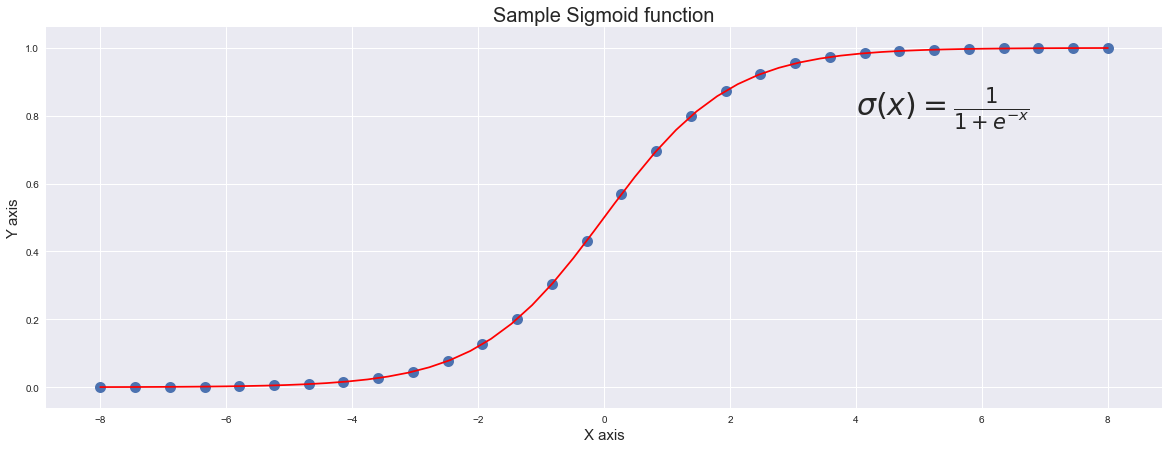

In [109]:
# plot sample sigmoid function

x1 = np.linspace(-8,8)
x2 = np.array([np.linspace(-8,8,30)])

plt.figure(1,figsize=(20,7))
plt.plot(x1,sigmoid(x1),"r")
plt.scatter(x2,sigmoid(x2),linewidth=4)
pylab.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=30)

plt.title("Sample Sigmoid function",fontsize=(20))
plt.xlabel("X axis",fontsize=(15))
plt.ylabel("Y axis",fontsize=(15))

plt.show()

del x1,x2


## 6.2 Parameter initialization 

In [110]:
def par_init(dim):
    
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    
    return w, b

## 6.3 Forward and backward propagation 

In [111]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION 
 
    A = sigmoid(np.dot(w.T, X) + b)  
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    # BACKWARD PROPAGATION (TO FIND GRAD)

    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

## 6.4 Optimimization

In [112]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)

        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
      
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


## 6.5 Predictions

In [113]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5 :
            Y_prediction[0, i] = 1 
        else :
            Y_prediction[0, i] = 0

    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## 6.6 Split all in model

In [114]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
   
    # initialize parameters with zeros 
    w, b = par_init(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    print('\n')
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## Run Model

In [115]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.02, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548932
Cost after iteration 200: 0.491649
Cost after iteration 300: 0.465080
Cost after iteration 400: 0.451224
Cost after iteration 500: 0.443361
Cost after iteration 600: 0.438617
Cost after iteration 700: 0.435621
Cost after iteration 800: 0.433662
Cost after iteration 900: 0.432348
Cost after iteration 1000: 0.431447
Cost after iteration 1100: 0.430820
Cost after iteration 1200: 0.430378
Cost after iteration 1300: 0.430063
Cost after iteration 1400: 0.429836
Cost after iteration 1500: 0.429672
Cost after iteration 1600: 0.429553
Cost after iteration 1700: 0.429466
Cost after iteration 1800: 0.429402
Cost after iteration 1900: 0.429355


train accuracy: 80.97333333333333 %
test accuracy: 80.76 %


# 7. Plots

## 7.1 Confusion Matrix 

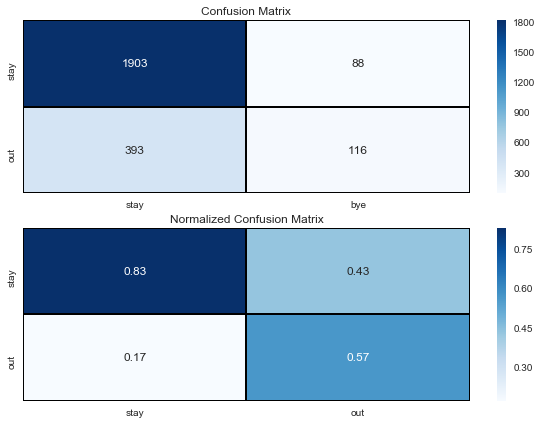

In [116]:
from sklearn.metrics import confusion_matrix

prediction_test = d["Y_prediction_test"]
prediction1 = prediction_test.T
y_test1 = y_test.T 
cnf_matrix = confusion_matrix(y_test1,prediction1)

plt.figure(2,figsize=(10,7))
plt.subplot(2,1,1)
plt.title("Confusion Matrix")

# Confusion Matrix
sns.heatmap(cnf_matrix,annot=True, fmt='.0f',robust=True,
            cmap = "Blues", linewidths=1, linecolor='black',xticklabels=["stay","bye"], yticklabels=["stay","out"])

# Normalized Confusion Matrix
plt.subplot(2,1,2)
plt.title("Normalized Confusion Matrix")
cnf_matrix_normalized = cnf_matrix/cnf_matrix.sum(axis=0)
sns.heatmap(cnf_matrix_normalized ,annot=True, fmt='.2f', 
            cmap = "Blues",linewidths=1, linecolor='black',xticklabels=["stay","out"], yticklabels=["stay","out"])

del y_test1, prediction1

## 7.2 Classification_report

In [117]:
from sklearn.metrics import classification_report

prediction_test = d["Y_prediction_test"]
prediction1 = prediction_test.T
y_test1 = y_test.T 

target_names = ['stay', 'out']
cr = classification_report(y_test1,prediction1,target_names=target_names)
print(cr)

             precision    recall  f1-score   support

       stay       0.83      0.96      0.89      1991
        out       0.57      0.23      0.33       509

avg / total       0.78      0.81      0.77      2500



## 7.3 Test Learning rates

learning rate is: 0.05
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.475862
Cost after iteration 200: 0.443281
Cost after iteration 300: 0.434508
Cost after iteration 400: 0.431432
Cost after iteration 500: 0.430200
Cost after iteration 600: 0.429669
Cost after iteration 700: 0.429430
Cost after iteration 800: 0.429319
Cost after iteration 900: 0.429267
Cost after iteration 1000: 0.429242
Cost after iteration 1100: 0.429230
Cost after iteration 1200: 0.429224
Cost after iteration 1300: 0.429221
Cost after iteration 1400: 0.429220
Cost after iteration 1500: 0.429219
Cost after iteration 1600: 0.429219
Cost after iteration 1700: 0.429219
Cost after iteration 1800: 0.429218
Cost after iteration 1900: 0.429218


train accuracy: 80.96 %
test accuracy: 80.68 %

-------------------------------------------------------

learning rate is: 0.04
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.491482
Cost after iteration 200: 0.451146
Cost after iteration 300: 0.438580
C

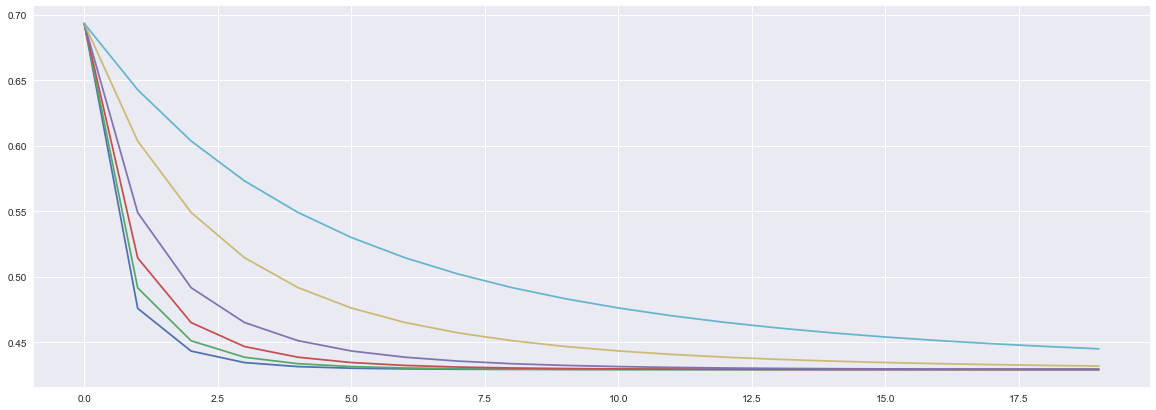

In [118]:
plt.figure(3,figsize=(20,7))
learning_rates = [0.05,0.04,0.03,0.02,0.01,0.005]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = i, print_cost = True)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))


## 7.4  Best learning Curve

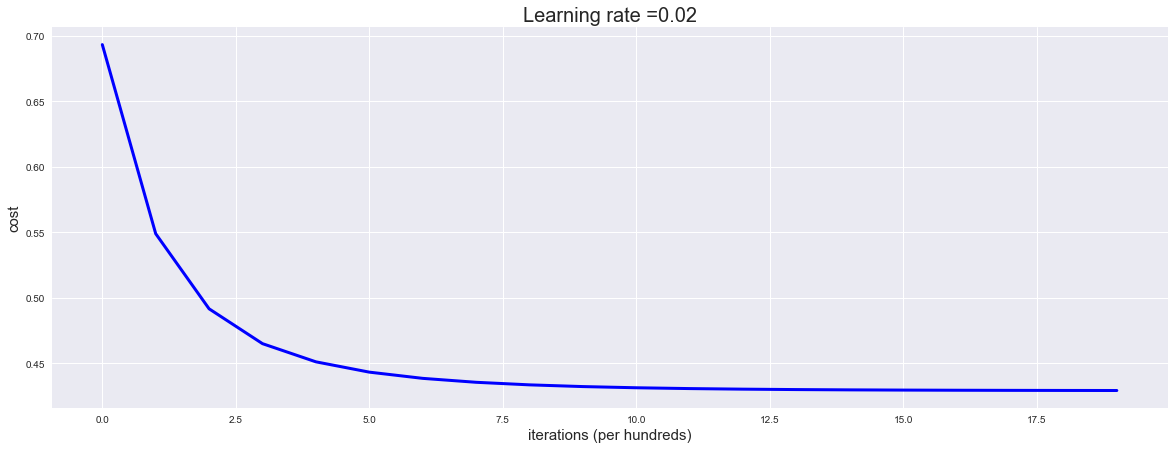

In [119]:
plt.figure(4,figsize=(20,7))
costs = np.squeeze(d['costs'])
plt.plot(costs,"b",linewidth=3)
plt.ylabel('cost',fontsize=(15))
plt.xlabel('iterations (per hundreds)',fontsize=(15))
plt.title("Learning rate =" + str(d["learning_rate"]),fontsize=(20))
plt.show()